For those who are already familliar with PyTorch, you can skip this. But if you are absolutely new to PyTorch please implement the tutorial at

https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

The objective is so you can differentiate the implementation using Numpy, Torch and Torch with Autograd. I'm assuming that no pre reading/studying is done (i.e you have come to class without going through the pytorch links on Spectrum)
 so I'm going to set 20 mins of the class for you to actually implement the tutorial above.

But just implementing the tutorial can be boring, especially if you are doing cnp in colab and not coding it again from scratch. So to slightly spice things up, please follow the instructions below.


1. Add some Gaussian noise to $y=sin(x)$ and plot the data.

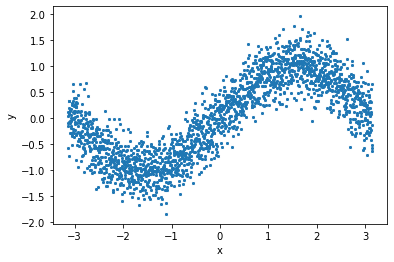

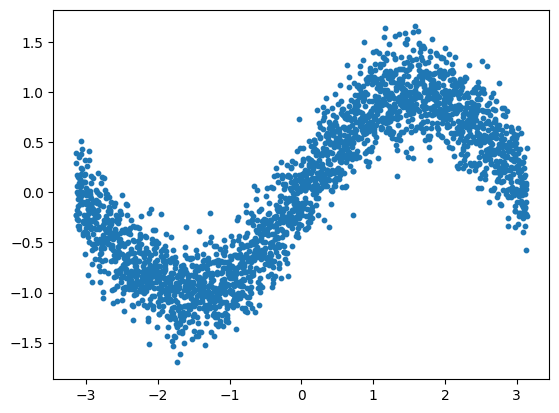

In [68]:
import torch
import math
import matplotlib.pyplot as plt

dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0")  # Uncomment this to run on GPU

x = torch.linspace(-math.pi, math.pi, 2500, device=device, dtype=dtype)
y = torch.sin(x) + torch.randn_like(x)*0.25

plt.scatter(x,y, s=10)

2. Plot the initial prediction when the weights were first initialized. An example is shown below. Your plot is obvious different because of the random initialization 
  

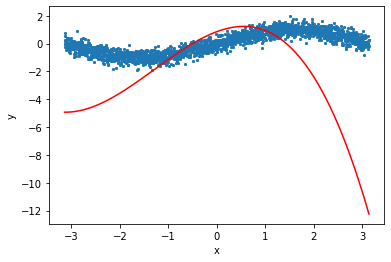

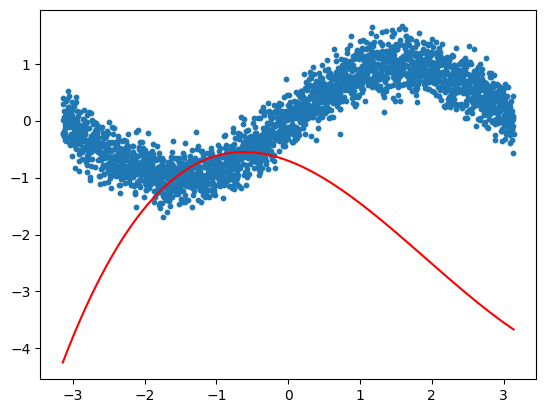

In [69]:
# Create random Tensors for weights. For a third order polynomial, we need
# 4 weights: y = a + b x + c x^2 + d x^3
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)


y_pred = a.item() + b.item() * x + c.item() * x ** 2 + d.item() * x ** 3

plt.plot(x, y_pred, c='red')
plt.scatter(x,y, s=10)

3. Print out the result of the final equation. Example shown below

4. Plot also the solutions at different epochs. An sample plot is shown below. I've not labelled the solution curves.

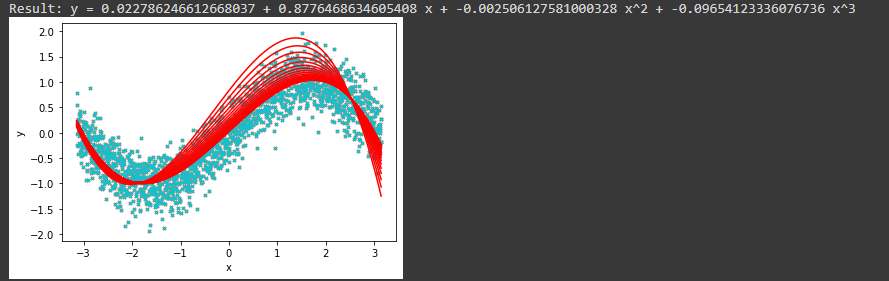

99 1846.000244140625
199 1185.634033203125
299 786.6044921875
399 545.2529296875
499 399.1214599609375
599 310.54638671875
699 256.79644775390625
799 224.14004516601562
899 204.27392578125
999 192.17269897460938
Result: y = -0.07367789000272751 + 0.7581589221954346 x + 0.013986269012093544 x^2 + -0.07930875569581985 x^3


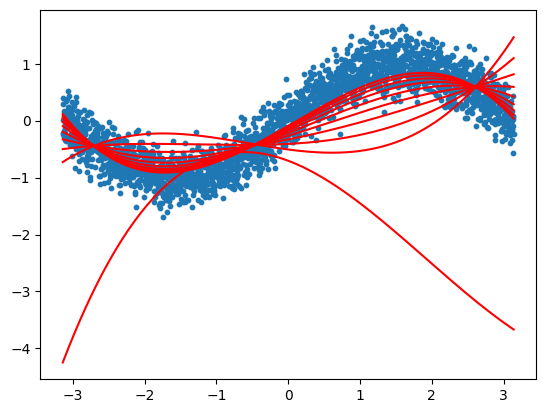

In [70]:
hyperparams = [(a.item(),b.item(),c.item(),d.item())]
losses = []
learning_rate = 1e-6
epochs = 1000
for t in range(epochs):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())
    losses.append(loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None
    
    #store hyperparameter values
    hyperparams.append((a.item(),b.item(),c.item(),d.item()))

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

for i in range(0, epochs, 100): #plot at intervals of 100
    a,b,c,d = hyperparams[i]
    Y = a + b * x + c * x ** 2 + d * x ** 3
    plt.plot(x, Y, c='red')
plt.scatter(x,y, s=10)

5. Plot the final solution only. Example shown below.

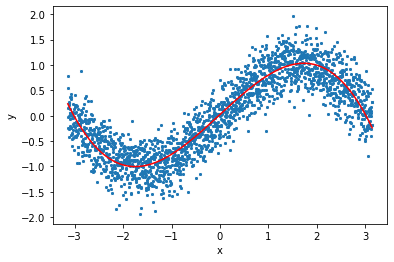

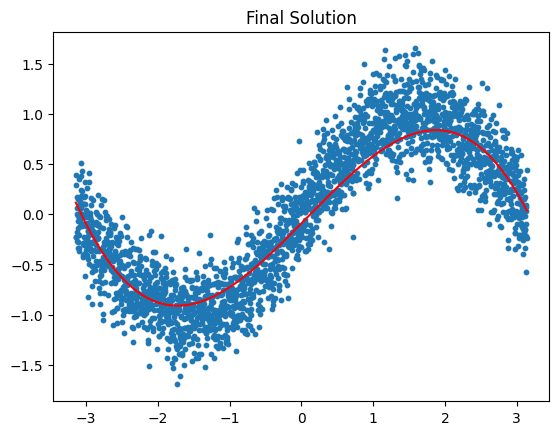

In [71]:
plt.title('Final Solution')
plt.plot(x, Y, c='red')
plt.scatter(x,y, s=10)

6. Plot the epoch vs loss graph. Example shown below


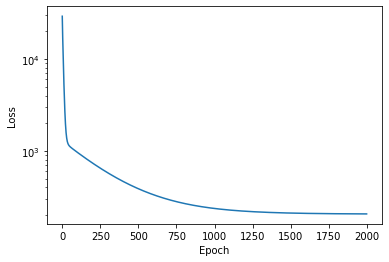

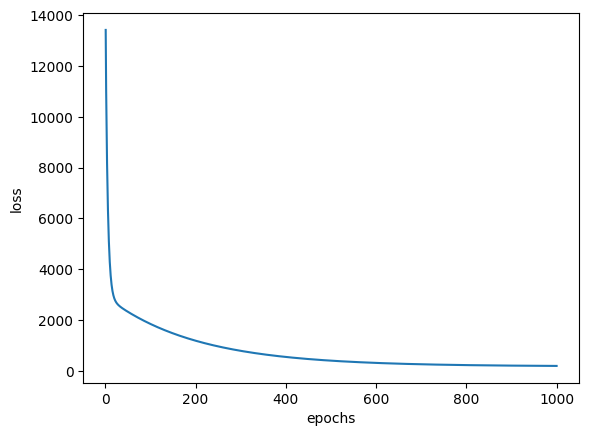

In [72]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(list(range(1,epochs+1)), losses)

7. What is the purpose of this exercise?

Ans: Learn how to use PyTorch for multilayer perceptron